1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [2]:
import scipy as sy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from scipy import stats
%matplotlib inline

<ipython-input-119-17426ba3fa45>:9: RuntimeWarning: divide by zero encountered in true_divide
  err = 1/(xx**(1/2))


(array([0.01181679, 0.        , 0.01181679, 0.04726716, 0.04726716,
        0.1063511 , 0.22451899, 0.34268688, 0.40177082, 0.36632046,
        0.36632046, 0.22451899, 0.1063511 , 0.08271752, 0.02363358]),
 array([-3.68411991, -3.26099312, -2.83786633, -2.41473954, -1.99161274,
        -1.56848595, -1.14535916, -0.72223237, -0.29910557,  0.12402122,
         0.54714801,  0.9702748 ,  1.3934016 ,  1.81652839,  2.23965518,
         2.66278197]),
 <BarContainer object of 15 artists>)

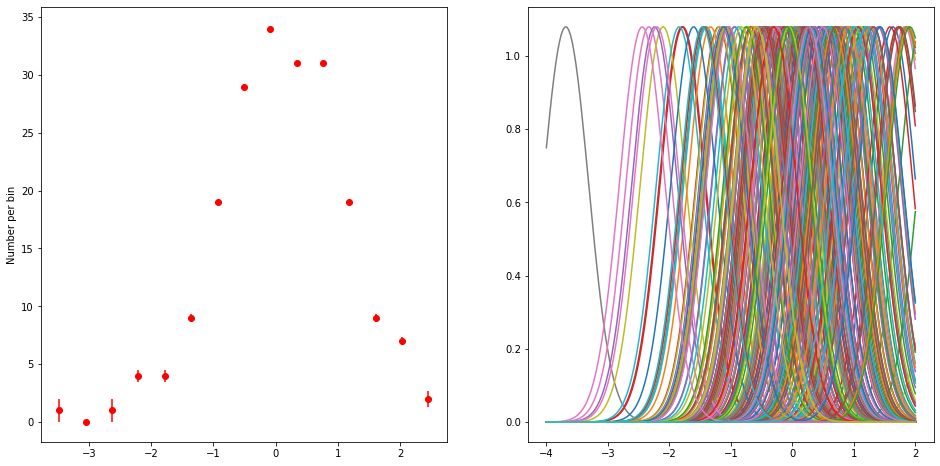

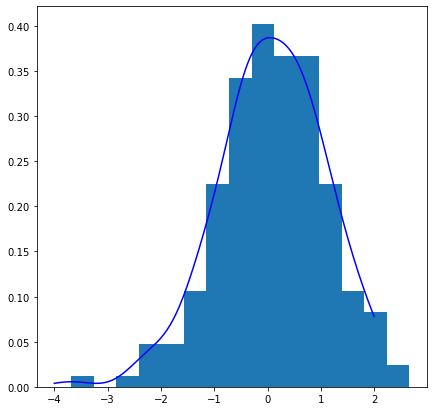

In [119]:
N = 200
x = np.random.normal(loc=0,scale=1,size=N)

fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,8)
ax[0].set_ylabel('Number per bin')
ax[0].yaxis.set_major_locator(MultipleLocator(5)) #yaxis show multiple of 5
xx,edges = np.histogram(x,15)
err = 1/(xx**(1/2)) #poisson uncertainty
bin_centres = (edges[:-1] + edges[1:])/2
ax[0].errorbar(bin_centres, xx, yerr=err, fmt='o', color='red')

std = 1.06*x.std()* (x.size ** (- 1/5))
p = np.linspace(np.min(x)//1, np.max(x)//1, N)
g = np.zeros((len(p),0))
for i in range(N):
    d = stats.norm.pdf(p, loc=x[i], scale=std).reshape(N,1)
    g = np.concatenate([g, d], axis = 1) #gaussians
    ax[1].plot(p, d)

fig2, ax2 = plt.subplots()
fig2.set_size_inches(7,7)
gaus = np.sum(g, axis=1) #gaussian
a = sy.integrate.trapz(gaus,p)
gaus = gaus/a
ax2.plot(p,gaus,color='blue')
ax2.hist(x,15,density=True)

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2020-11-29 17:12:29--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2020-11-29 17:12:30--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc79b7df0a81094bcce3ea3710f9.dl.dropboxusercontent.com/cd/0/inline/BEL-iTXKnyY_lw60p6CpfvbKj6o8FCsoa7Xvcva0eTDHu5QlmGCk7-AtGySPjJhueWb8QzaEgcq798w0lMTDADfh5Sdm_lnd1CHBmhksA9wsMg/file# [following]
--2020-11-29 17:12:30--  https://uc79b7df0a81094bcce3ea3710f9.dl.dropboxusercontent.com/cd/0/inline/BEL-iTXKnyY_lw60p6CpfvbKj6o8FCsoa7Xvcva0eTDHu5QlmGCk7-AtGySPjJhueWb8QzaEgcq

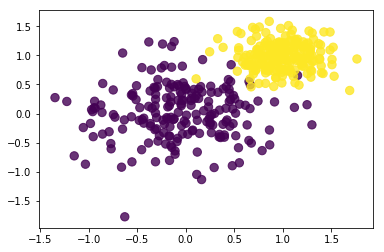

In [120]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

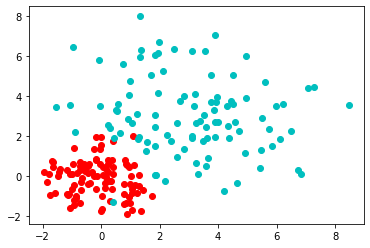

In [137]:
def gaussian_2d_function(m1,std1,m2,std2,N):
    g1 = [np.random.normal(loc=m1,scale=std1,size=N),np.random.normal(loc=m1,scale=std1,size=N)]
    g2 = [np.random.normal(loc=m2,scale=std2,size=N),np.random.normal(loc=m2,scale=std2,size=N)]
    return g1,g2

g1,g2 = gaussian_2d_function(0,1,3,2,100)
fig,ax = plt.subplots()
ax.plot(g1[0],g1[1],'o', color='r')
ax.plot(g2[0],g2[1],'o', color='c')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [140]:
! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2020-11-29 17:34:39--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2020-11-29 17:34:40--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0fbc1c0b3464cdb50894e93726.dl.dropboxusercontent.com/cd/0/inline/BELlz9D7F9CVr9wrbbsIkzVRuZsvnc70aTlUGRFG7n3nHBuY3UdsYhKuMAtHzd8RnUsVX1ViqDMOeCGh_plxoRnxsukFFnd0ImZ2FoZnfVbfTg/file# [following]
--2020-11-29 17:34:40--  https://uc0fbc1c0b3464cdb50894e93726.dl.dropboxusercontent.com/cd/0/inline/BELlz9D7F9CVr9wrbbsIkzVRuZsvnc70aTlUGRFG7n3nHBuY3UdsYhKuMAtHzd8RnUsVX1ViqDMOeCGh_plxoRnxsukFFnd0ImZ2FoZnfVbfTg/file
R

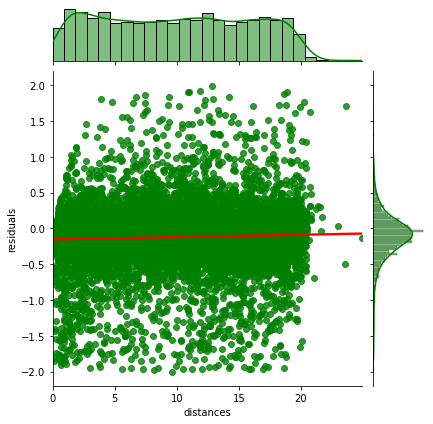

In [4]:
import pandas as pd
import seaborn as sns

d = np.load('residuals_261.npy', allow_pickle=True).item()
df = pd.DataFrame(d)

df = df[abs(df['residuals'])<2] #abs smaller than 2

slope,intercept,rvalue,pvalue,stderr = stats.linregress(df['residuals'],df['distances']) #linear regression
prediction = slope*df['residuals']+intercept

# jointplot
sns.jointplot(x=df['distances'], y=df['residuals'], kind='reg',color='g',joint_kws={'line_kws':{'color':'red'}})

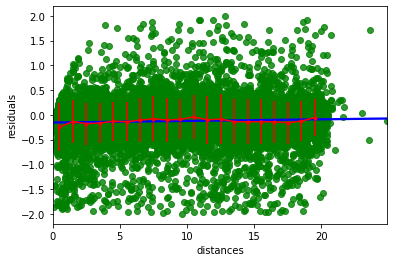

In [27]:
# x
half_bin = 0.5
x = np.linspace(1,20,20)-half_bin
# y and erry
df2 = df.copy()
y = np.zeros(20)
erry = np.zeros(20)
for i in range(20):
    res_bins = df2[df2['distances']<(x[i]+half_bin)]
    y[i] = np.mean(res_bins['residuals'])
    erry[i] = np.std(res_bins['residuals'])
    df2 = df2[df2['distances']>=(x[i]+half_bin)]
sns.regplot(x=df['distances'], y=df['residuals'], color='g',line_kws={"color": "blue"})
plt.errorbar(x=x, y=y, yerr=erry, marker='.',color='r')
plt.show()